In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

# Problem 3, 

We want to minimuize the sum of probabilities as we sum from $n\ =\ 1 \to \infty$ by finding a value for $\alpha$ that does this. We have that $\sum_{n\ =\ 0}^{\infty} \frac{1}{(\ n\ +\ a\ )^\alpha}$ for $a\ =\ 1$, which is in the form  of a Hurwitz-zeta function:

In [4]:
#define the inpu parameters:
a = 1
alpha = np.linspace(1+0.01,10,1000)

#run the simulation:
zeta = special.zeta(alpha,a)


In [5]:
# get references:
min_zeta_vs_alpha = pd.DataFrame()
min_zeta_vs_alpha['min_z']= np.round(zeta, 4)
min_zeta_vs_alpha['alpha']= alpha

f = [round(i, 2) for i in frange(1.99,2,0.0001)]

In [8]:
min_zeta_vs_alpha.loc(min_zeta_vs_alpha['min_z'])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [9]:
xy = min_zeta_vs_alpha.loc[min_zeta_vs_alpha['min_z'] == 1.9977]

In [10]:
xy

,min_z,alpha
80,1.9977,1.72992


In [11]:
y = [np.log10(xy['alpha'].item()) for i in range(1000)]
y2 = [np.log10(xy['min_z'].item()) for i in range(1000)]

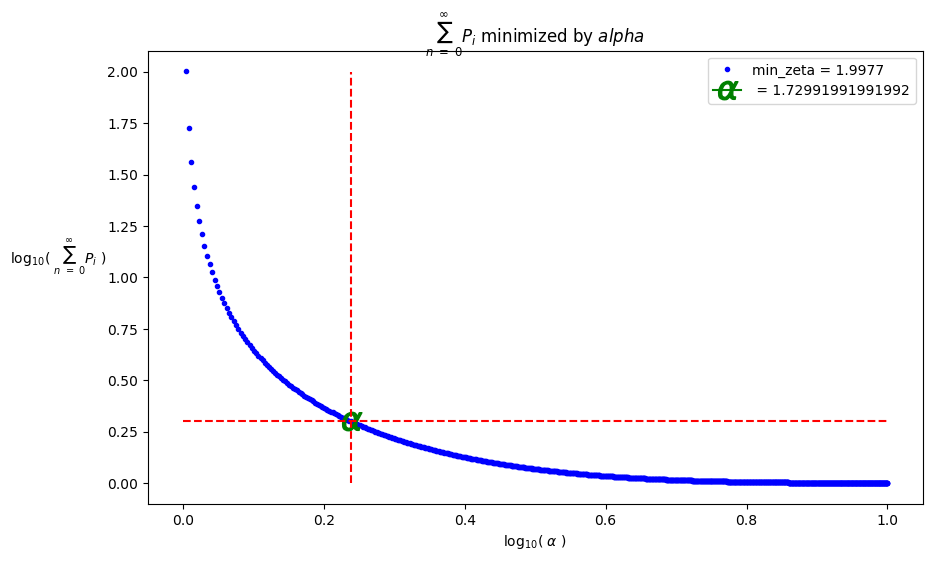

In [21]:
#Now we can plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'$\sum_{n\ =\ 0}^{\infty}P_{i}$ minimized by $alpha$')
plt.plot(np.log10(min_zeta_vs_alpha['alpha']), np.log10(min_zeta_vs_alpha['min_z']), '.', color='blue', 
         label='min_zeta = {}'.format(xy['min_z'].item()))
plt.plot(np.log10(xy['alpha']),np.log10(xy['min_z']),marker=r'$\alpha$', markersize=15, color='green', 
         label=' = {}'.format(xy['alpha'].item()))
plt.plot(y,np.linspace(0,2,1000),linestyle='--', color='red')
plt.plot(np.linspace(0,1,1000),y2,linestyle='--', color='red')
plt.xlabel(r'$\log_{10}(\ \alpha\ )$')
plt.ylabel(r'$\log_{10}(\ \sum_{n\ =\ 0}^{\infty}P_{i}\ )$',rotation='horizontal', labelpad=35)
plt.legend(loc='upper right')
plt.show()

In [ ]:
min(zeta)

In [ ]:
round(special.zeta(alpha[80],1),4)

In [ ]:
alpha[80]

# Problem 4:

### part a. plot the ccdf of the new data

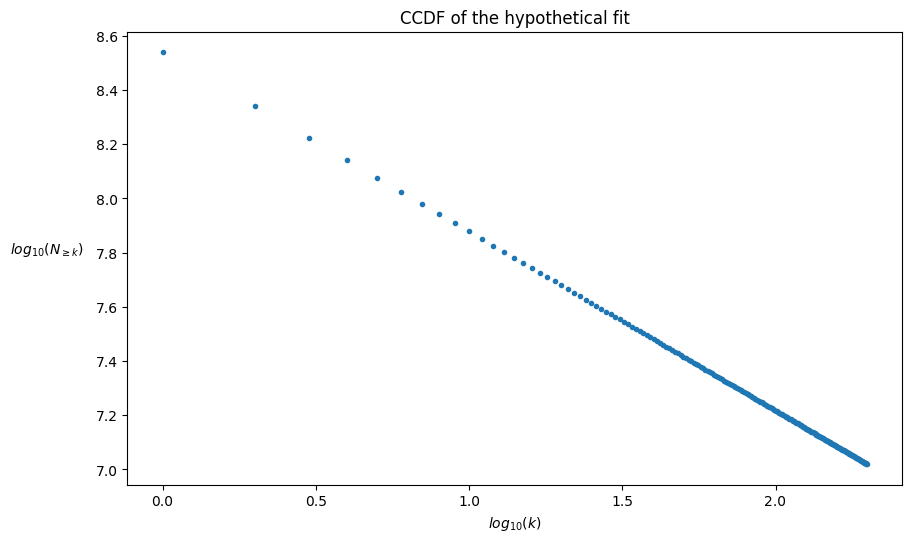

In [22]:
#params:
gamma = 0.661

# determine frequencies:
k = np.linspace(1,199,199)

# determine the counts of the frequencies:
N_geq_k = 3.46*(10**8*(k**-gamma))

#plot it:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'CCDF of the hypothetical fit')
plt.plot(np.log10(k),np.log10(N_geq_k), '.')
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$log_{10}(N_{\geq k})$',rotation='horizontal', labelpad=35)
plt.show()

In [23]:
#we want to work with all of the data:
data = pd.read_csv('vocab_cs_mod.txt',delimiter=' ', header=None,names=['k','N_k'])

#get the ccdf back 
cdf = np.cumsum(data['N_k'])
ccdf= np.subtract(1,cdf)

#add the generated samples to the same data structure:
new_data = pd.DataFrame(index=[i for i in range(len(data),199+len(data))])
new_data['k'] = k[::-1]
new_data[r'$N_{\geq k}$'] = N_geq_k[::-1]

#fix index:
data[r'$N_{\geq k}$'] = ccdf.abs()

#add frames together
data = data.add(new_data, fill_value=0)

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


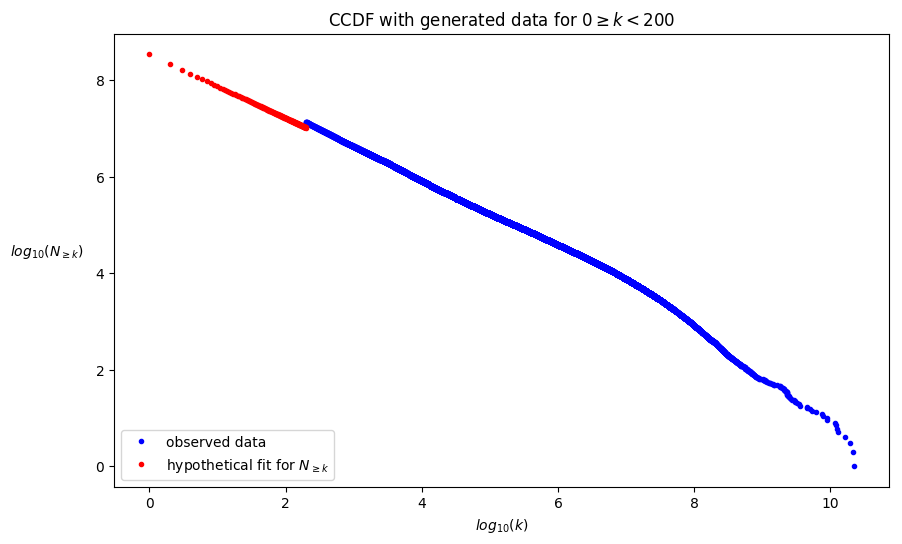

In [32]:
#add coloring:
data['color'] = np.where(data.eval('k<200 and k>=200'), 'red','blue')

#Now we can plot:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'CCDF with generated data for $0\geq k<200$')
plt.plot(np.log10(data['k'][:238591]),np.log10(data[r'$N_{\geq k}$'][:238591]), '.', color='blue',
         label='observed data')
plt.plot(np.log10(data['k'][238592:]),np.log10(data[r'$N_{\geq k}$'][238592:]), '.', color='red',
         label=r'hypothetical fit for $N_{\geq k}$')
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$log_{10}(N_{\geq k})$',rotation='horizontal', labelpad=35)
plt.legend(loc='lower left')
plt.show()

In [25]:
m = max(data['k'])
m

30578667846.0

In [26]:
hyp_k = np.linspace(1,m,10000)
hyp_N_geq_k = 3.46*(10**8*(hyp_k**-gamma))

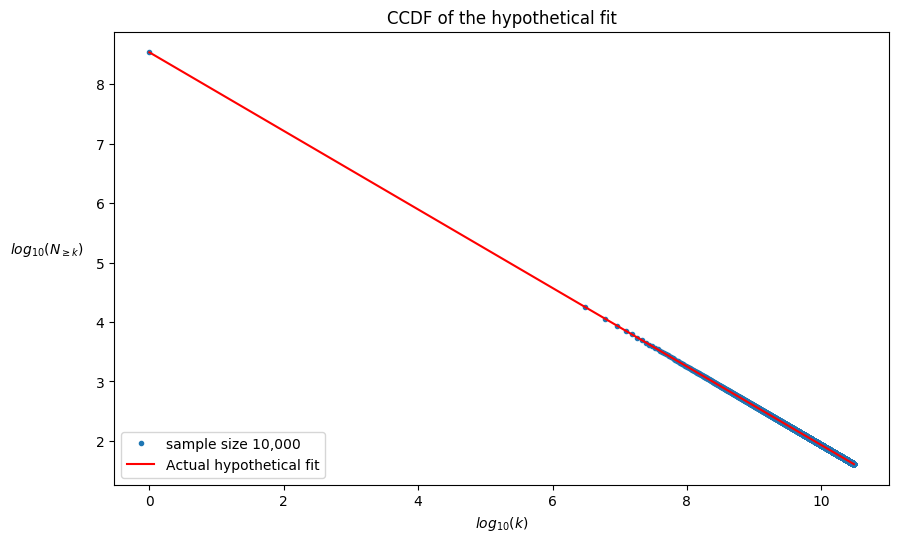

In [27]:
#plot it:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
plt.title(r'CCDF of the hypothetical fit')
plt.plot(np.log10(hyp_k), np.log10(hyp_N_geq_k), '.', label='sample size 10,000')
plt.plot(np.log10(hyp_k), np.log10(hyp_N_geq_k),color='red' ,label='Actual hypothetical fit')
plt.xlabel(r'$log_{10}(k)$')
plt.ylabel(r'$log_{10}(N_{\geq k})$',rotation='horizontal', labelpad=35)
plt.legend(loc='lower left')
plt.show()

### part b. Compute mean and variance of new distribution:

In [28]:
#get hypothetical N_K values for k = 1 to k  = 199:
for i in range(len(data[:-199]), len(data)):
    data['N_k'][i] = np.absolute(data[r'$N_{\geq k}$'][i] - data[r'$N_{\geq k}$'][i - 1])

C:\Users\Dave Landay\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
mean = data['N_k'].mean()
var  = data['N_k'].var()

In [30]:
print('The mean of the data, inclusive of the hypothetical extension, is {}.\nThe variance of the same data is {}'.format(round(mean,3),round(var,3)))

The mean of the data, inclusive of the hypothetical extension, is 1474.752.
The variance of the same data is 86117032264.249


### part c. Estimate:
i.
the hypothetical fraction of words that appear once out of all words
(think of words as organisms here),

ii.
the hypothetical total number and fraction of unique words in Google’s
data set (think at the species level now),

iii.
and what fraction of total words are left out of the Google data set by
providing only those with counts
k
$\geq$
200
(back to words as organisms)

##### part (i) 
We now have the counts of hypothetical words that appear $k$ times. We can convert these counts into probabilities by dividing by the total number of words in the data set. This looks like $\frac{N_k}{\sum_{k=1}^{k_{max}}k N_k}$. 

In [33]:
d =  np.multiply(data['k'],data['N_k'])

In [35]:
e = np.sum(d)

In [43]:
e

838492320161.10876

In [36]:
3.057867e+10/e

0.036468634553652901

In [44]:
data['n_k'] = d/e

In [46]:
data['n_k'].iloc[-1]

0.00015167203815096743

##### part (ii)

the hypothesized number of unique words is just the number of groups that are of size 1. The fraction of unique words would then be that number divided by the total number of words in the corpus

In [52]:
num_unique = data.where(data['N_k'] == 1)

In [55]:
num_unique = np.sum(num_unique['N_k'])

In [56]:
num_unique

145424.0

In [58]:
frac_unique = num_unique/e

In [59]:
frac_unique

1.7343510071989458e-07

In [61]:
non_hyp = data.where(data['k']>=200)

In [62]:
tot_non_hyp = np.sum(np.multiply(non_hyp['k'], non_hyp['N_k']))

In [63]:
tot_non_hyp

834645506207.0

In [64]:
tot_non_hyp/e

0.99541222517891437